In [1]:
import numpy as np
import pandas as pd
import pickle
import csv
import os
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
columnsList = ['userId', 'appId', 'playtimeMins', 'gameDev', 'modderOrNot']
totalUserData = []

with open("Documents/SoSe2020/NEProject/Data/totalUsersAppsDetails.csv", "r") as csvFile:
    csvReader = csv.reader(csvFile)
    next(csvReader)
    for row in csvReader:      
        totalUserData.append([row[1], row[2], row[3], row[4], row[5]])

totalUserDf = pd.DataFrame(totalUserData, columns=columnsList)
#totalUserDf

In [3]:
onlyModderAppsDf = totalUserDf[totalUserDf.modderOrNot == "Yes"]
onlyPlayersAppsDf = totalUserDf[totalUserDf.modderOrNot == "No"] 

In [4]:
columnsListApps = ['appId', 'avgPlayTime', 'noOfEdges', 'gameValue', 'modValue', 'gameDev']
appsData = []

with open("Documents/SoSe2020/NEProject/Data/avgValueGamesMods.csv", "r") as csvFile:
    csvReader = csv.reader(csvFile)
    next(csvReader)
    for row in csvReader:      
        tempDf = totalUserDf[totalUserDf.appId == row[1]]
        gameDev = tempDf.gameDev.tolist()[0]
        appsData.append([row[1], row[2], row[3], row[4], row[5], gameDev])

totalAppsDf = pd.DataFrame(appsData, columns=columnsListApps)
#totalAppsDf

In [5]:
columnsListUsers = ['userId', 'noOfEdgesWithModders']
playersModdersEdgesData = []

with open("Documents/SoSe2020/NEProject/Data/playersModdersEdges.csv", "r") as csvFile:
    csvReader = csv.reader(csvFile)
    next(csvReader)
    for row in csvReader:      
        playersModdersEdgesData.append([row[1], row[2]])

playersModersEdgesDf = pd.DataFrame(playersModdersEdgesData, columns=columnsListUsers)
playersModersEdgesDf

,userId,noOfEdgesWithModders
0,76561197994737669,35
1,76561198033534984,43
2,76561198201962505,345
3,76561197990805512,21
4,76561198056603660,24
...,...,...
30251,76561198051885039,28
30252,76561198072463345,39
30253,76561198271954934,54
30254,76561197991985142,185


### Calculate NPLG/GD - Avg no. of games a player owns from one game developer:

In [5]:
avgGamesEachUser = {}

for userId in list(set(totalUserDf.userId.tolist())):
    tempDf = totalUserDf[totalUserDf.userId == userId]
    avgGamePerDev = len(tempDf) / len(list(set(tempDf.gameDev.tolist())))
    avgGamesEachUser[userId] = avgGamePerDev

avgGamesEachUserDf = pd.DataFrame.from_dict(avgGamesEachUser, orient='index', columns=["avgGamePerDev"])
avgGamesEachUserDf = avgGamesEachUserDf.reset_index().rename(columns={"index": "userId"})
avgGamesEachUserDf

KeyboardInterrupt: 

In [7]:
#avgGamesEachUserDf.to_csv('Documents/SoSe2020/NEProject/Data/avgGamesPerDevEachUserDf.csv')
avgGamesPerDevList = avgGamesEachUserDf.avgGamePerDev.tolist()
AvgGamePerDevValue = sum(avgGamesPerDevList) / len(avgGamesPerDevList)
AvgGamePerDevValue #1.123013671083003

1.1230136710829988

### Vg - Average Value of a Game

In [8]:
avgValueOfGame = sum([float(i) for i in totalAppsDf.gameValue.tolist()]) / len(totalAppsDf.gameValue.tolist())
avgValueOfGame

798.1495790858866

### Vm - Average Value of a Mod

In [9]:
avgValueOfMod = 0.1 * avgValueOfGame
avgValueOfMod

79.81495790858867

### NPLM/M - Average no. of mods a player has

In [10]:
avgModEachPlayer = sum([int(i) for i in playersModersEdgesDf.noOfEdgesWithModders.tolist()]) / (len(playersModersEdgesDf) * 1648)
avgModEachPlayer

0.13990751814291508

### Average no. of games / game developer

In [11]:
avgGamesPerDev = len(totalAppsDf) / len(set(totalAppsDf.gameDev.tolist()))
avgGamesPerDev

1.2254901960784315

In [6]:
fv = {
        'Pg': 50.4306599999996,
        'Nplg-gd': 1.123013671083, #AvgGamePerDevValue,
        'Ngd': 408,
        'Vg': 798.149579085887, #avgValueOfGame,
        'Cgd': 2,
        'Bpl': [0.5, 1],
        'Nplm-m': 0.139907518142915, #avgModEachPlayer,
        'Nm': 1648, # len(set(onlyModderAppsDf.userId.tolist())),
        'Npl': 28608, # len(set(onlyPlayersAppsDf.userId.tolist())),
        'Vm': 79.8149579085887, #avgValueOfMod,
        'Cm': 0.001,
        'Em': 1200,
        'Ng-gd': 1.22549019607843  #avgGamesPerDev 
     }


In [13]:
fvDf = pd.DataFrame.from_dict(fv, orient='index', columns = ['Values'])
fvDf = fvDf.reset_index().rename(columns = {'index': 'Variables'})

In [14]:
fvDf.to_csv(r'Documents/SoSe2020/NEProject/Data/finalValues/fv1648.csv', index='False')

In [7]:
U_Games1 = fv['Nplg-gd'] * fv['Ngd'] * fv['Vg'] - (fv['Cgd'] * (fv['Ngd'] ** 2))
U_Mods1 = 0 #fv['Bpl'][0] * (fv['Nplm-m'] * fv['Nm'] * fv['Vm'] - (fv['Cm'] * (fv['Nm'] ** 2)))
U_Player1 = U_Games1 + U_Mods1 - (fv['Pg'] * fv['Nplg-gd'] * fv['Ngd'])
print(U_Games1)
print(U_Mods1)
print(U_Player1)

32775.8186640981
0
9669.015850428932


In [9]:
U_Games2 = fv['Nplg-gd'] * fv['Ngd'] * fv['Vg'] - (fv['Cgd'] * (fv['Ngd'] ** 2))
U_Mods2 = fv['Bpl'][1] * (fv['Nplm-m'] * fv['Nm'] * fv['Vm'] - (fv['Cm'] * (fv['Nm'] ** 2)))
U_Player2 = U_Games2 + U_Mods2 - (fv['Pg'] * fv['Nplg-gd'] * fv['Ngd'])
print("U_Games 2: ",U_Games2)
print("U_Mods 2: ",U_Mods2)
print("U_Player 2: ",U_Player2)

U_Modder2 = U_Player2 - (fv['Em'] / fv['Nm'])
print("U_Modder 2: ",U_Modder2)

U_Games 2:  32775.8186640981
U_Mods 2:  15686.83848291524
U_Player 2:  25355.854333344174
U_Modder 2:  25355.126178004368


In [10]:
U_GameDev = fv['Nplg-gd'] * (fv['Nm'] + fv['Npl']) * fv['Pg'] * 0.75 - (100 * fv['Ng-gd'])
U_GameDev

1285023.4545288743

In [11]:
U_Steam = fv['Nplg-gd'] * fv['Ngd'] * (fv['Nm'] + fv['Npl']) * fv['Pg'] * 0.25 + fv['Ngd'] * fv['Ng-gd'] * 100
U_Steam

174829856.4825936

In [13]:
P_Games1 = U_Games1 - U_Player1
P_Games1

23106.80281366917

### Generating Results Graph

In [250]:
def makeModdersPlayers(n):
    tempTotalUserDf = totalUserDf.copy(deep = True)
    tempModdersList = list(set(tempTotalUserDf[tempTotalUserDf.modderOrNot == 'Yes'].userId.tolist()))
    for eachTempModder in tempModdersList[n:]:
        tempTotalUserDf.loc[tempTotalUserDf['userId'] == eachTempModder, 'modderOrNot'] = 'No'
    
    return tempTotalUserDf
# This will also get new modder player edges

def getNewTotalAppsDf(tempUserDf):
    newTotalAppsDf = totalAppsDf.copy(deep=True)
    newNoOfEdges = []
    newGameValue = []
    newModValue = []
    
    tempModderDf = tempUserDf[tempUserDf.modderOrNot == 'Yes']
    print(len(tempModderDf))
    for everyApp in newTotalAppsDf.appId.tolist():
        appNoOfEdge = len(tempModderDf[tempModderDf.appId == everyApp])
        appPlayTime = newTotalAppsDf.loc[newTotalAppsDf['appId'] == everyApp, 'avgPlayTime'].iloc[0]
        #print(everyApp, appNoOfEdge, appPlayTime)
        newNoOfEdges.append(appNoOfEdge)
        newGameValue.append(float(appPlayTime) * 10 / (10 + appNoOfEdge))    
        newModValue.append(float(appPlayTime) / (10 + appNoOfEdge))
    newTotalAppsDf["noOfEdges"] = newNoOfEdges
    newTotalAppsDf["gameValue"] = newGameValue
    newTotalAppsDf["modValue"] = newModValue
    return newTotalAppsDf

def getPlayerModderEdges(tempTotalUserDf):
    columnsListUsers = ['userId', 'noOfEdgesWithModders']
    playerModdersEdgesDf = pd.DataFrame(columns = columnsListUsers)
    
    tempModderDf = tempTotalUserDf[tempTotalUserDf.modderOrNot == 'Yes']
    userList = []
    userModderEdges = []
    for eachUser in set(tempTotalUserDf.userId.tolist()):
        eachUserEdges = 0 
        eachUserAppList = tempTotalUserDf[tempTotalUserDf.userId == eachUser].appId.tolist()
        for eachApp in eachUserAppList:
            eachUserEdges += len(tempModderDf[tempModderDf.appId == eachApp])
        userList.append(eachUser)
        userModderEdges.append(eachUserEdges)
    playerModdersEdgesDf['userId'] = userList
    playerModdersEdgesDf['noOfEdgesWithModders'] = userModderEdges
    return playerModdersEdgesDf

In [21]:
noOfModders = np.linspace(0, 9000, 32)
U_GameDevValues = []
U_SteamValues = []
U_Player1Values = []
U_Player2Values = []
U_Modder2Values = []
U_Games1Values = []
U_Mods1Values = []
U_Games2Values = []
U_Mods2Values = []

In [273]:
# # For comparison purposes total no. of players is kept as a constant
# # The only thing that changes is whether a player is modder or not

# for a in noOfModders:
#     tempTotalUserDf = makeModdersPlayers(int(a))
#     tempPlayerDf = tempTotalUserDf[tempTotalUserDf.modderOrNot == 'No']
#     tempModderDf = tempTotalUserDf[tempTotalUserDf.modderOrNot == 'Yes']
#     tempAppDf = getNewTotalAppsDf(tempTotalUserDf)    
    
#     tempAvgGameValue = sum([float(val) for val in tempAppDf.gameValue.tolist()]) / len(tempAppDf.gameValue.tolist())
#     tempAvgModValue = 0.1 * tempAvgGameValue
    
#     tempPlayerModderEdges = getPlayerModderEdges(tempTotalUserDf)
#     if len(tempPlayerModderEdges) == 0 or len(set(tempModderDf.userId.tolist())) == 0:
#         print("tempPlayerModderEdges is ", len(tempPlayerModderEdges))
#         print("tempModderDf.userId.tolist", len(set(tempModderDf.userId.tolist())))
#         if len(tempPlayerModderEdges) == 0:
#             tempAvgModPerPlayer = sum([int(i) for i in tempPlayerModderEdges.noOfEdgesWithModders.tolist()]) / (1 * len(set(tempModderDf.userId.tolist())))
#         else:
#             tempAvgModPerPlayer = sum([int(i) for i in tempPlayerModderEdges.noOfEdgesWithModders.tolist()]) / (len(tempPlayerModderEdges) * 1)
#     else:
#         tempAvgModPerPlayer = sum([int(i) for i in tempPlayerModderEdges.noOfEdgesWithModders.tolist()]) / (len(tempPlayerModderEdges) * len(set(tempModderDf.userId.tolist()))) 
    
#     tv = {
#             'Pg': 50.4306599999996,
#             'Nplg-gd': AvgGamePerDevValue,
#             'Ngd': 408,
#             'Vg': tempAvgGameValue, # variable
#             'Cgd': 2,
#             'Bpl': [0.5, 1],
#             'Nplm-m': tempAvgModPerPlayer, # variable
#             'Nm': len(set(tempModderDf.userId.tolist())), # variable
#             'Npl': len(set(tempPlayerDf.userId.tolist())), # variable
#             'Vm': tempAvgModValue, # variable
#             'Cm': 0.001,
#             'Em': 1200,
#             'Ng-gd': avgGamesPerDev, 
#             'UT_GameDev': 0,
#             'UT_Steam': 0,
#             'UT_Player1': 0,
#             'UT_Player2': 0,
#             'UT_Modder2': 0,
#             'UT_Games1': 0,
#             'UT_Mods1': 0,
#             'UT_Games2': 0,
#             'UT_Mods2': 0
#         }
    
#     tv['UT_GameDev'] = tv['Nplg-gd'] * (tv['Nm'] + tv['Npl']) * tv['Pg'] * 0.75 - (100 * tv['Ng-gd'])
    
#     tv['UT_Steam'] = tv['Nplg-gd'] * tv['Ngd'] * (tv['Nm'] + tv['Npl']) * tv['Pg'] * 0.25 + tv['Ngd'] * tv['Ng-gd'] * 100
    
#     tv['UT_Games1'] = tv['Nplg-gd'] * tv['Ngd'] * tv['Vg'] - (tv['Cgd'] * (tv['Ngd'] ** 2))
#     tv['UT_Mods1'] = tv['Bpl'][0] * (tv['Nplm-m'] * tv['Nm'] * tv['Vm'] - (tv['Cm'] * (tv['Nm'] ** 2)))
#     tv['UT_Player1'] = tv['UT_Games1'] + tv['UT_Mods1'] - (tv['Pg'] * tv['Nplg-gd'] * tv['Ngd'])
    
#     tv['UT_Games2'] = tv['Nplg-gd'] * tv['Ngd'] * tv['Vg'] - (tv['Cgd'] * (tv['Ngd'] ** 2))
#     tv['UT_Mods2'] = tv['Bpl'][1] * (tv['Nplm-m'] * tv['Nm'] * tv['Vm'] - (tv['Cm'] * (tv['Nm'] ** 2)))
#     tv['UT_Player2'] = tv['UT_Games2'] + tv['UT_Mods2'] - (tv['Pg'] * tv['Nplg-gd'] * tv['Ngd'])
    
#     if tv['Nm'] == 0:
#         tv['UT_Modder2'] = tv['UT_Player2']
#     else:
#         tv['UT_Modder2'] = tv['UT_Player2'] - (tv['Em'] / tv['Nm'])
#     U_GameDevValues.append(tv['UT_GameDev'])
#     U_SteamValues.append(tv['UT_Steam'])
#     U_Player1Values.append(tv['UT_Player1'])
#     U_Player2Values.append(tv['UT_Player2'])
#     U_Modder2Values.append(tv['UT_Modder2']) 
    
#     tvDf = pd.DataFrame.from_dict(tv, orient='index', columns = ['Values'])
#     tvDf = tvDf.reset_index().rename(columns = {'index': 'Variables'})
#     tvDf.to_csv(r'Documents/SoSe2020/NEProject/Data/finalValues/fv_' + str(tv['Nm']) + '.csv', index='False')

0
tempPlayerModderEdges is  30256
tempModderDf.userId.tolist 0
746
1665
2326
3209
4123
4770
5985
6977
7799
8501
9192
10082
10662
11470


KeyboardInterrupt: 

In [22]:
# For comparison purposes total no. of players is kept as a constant
# The only thing that changes is whether a player is modder or not

for a in noOfModders:
   
    tv = {
            'Pg': 50.4306599999996,
            'Nplg-gd': AvgGamePerDevValue,
            'Ngd': 408,
            'Vg': avgValueOfGame, # variable
            'Cgd': 2,
            'Bpl': [0.5, 1],
            'Nplm-m': avgModEachPlayer, # variable
            'Nm': int(a), # variable
            'Npl': len(set(onlyPlayersAppsDf.userId.tolist())), # variable
            'Vm': avgValueOfMod, # variable
            'Cm': 0.001,
            'Em': 1200,
            'Ng-gd': avgGamesPerDev, 
            'UT_GameDev': 0,
            'UT_Steam': 0,
            'UT_Player1': 0,
            'UT_Player2': 0,
            'UT_Modder2': 0,
            'UT_Games1': 0,
            'UT_Mods1': 0,
            'UT_Games2': 0,
            'UT_Mods2': 0
        }
    
    tv['UT_GameDev'] = tv['Nplg-gd'] * (tv['Nm'] + tv['Npl']) * tv['Pg'] * 0.75 - (100 * tv['Ng-gd'])
    
    tv['UT_Steam'] = tv['Nplg-gd'] * tv['Ngd'] * (tv['Nm'] + tv['Npl']) * tv['Pg'] * 0.25 + tv['Ngd'] * tv['Ng-gd'] * 100
    
    tv['UT_Games1'] = tv['Nplg-gd'] * tv['Ngd'] * tv['Vg'] - (tv['Cgd'] * (tv['Ngd'] ** 2))
    tv['UT_Mods1'] = tv['Bpl'][0] * (tv['Nplm-m'] * tv['Nm'] * tv['Vm'] - (tv['Cm'] * (tv['Nm'] ** 2)))
    tv['UT_Player1'] = tv['UT_Games1'] - (tv['Pg'] * tv['Nplg-gd'] * tv['Ngd'])
    
    tv['UT_Games2'] = tv['Nplg-gd'] * tv['Ngd'] * tv['Vg'] - (tv['Cgd'] * (tv['Ngd'] ** 2))
    tv['UT_Mods2'] = tv['Bpl'][1] * (tv['Nplm-m'] * tv['Nm'] * tv['Vm'] - (tv['Cm'] * (tv['Nm'] ** 2)))
    tv['UT_Player2'] = tv['UT_Games2'] + tv['UT_Mods2'] - (tv['Pg'] * tv['Nplg-gd'] * tv['Ngd'])
    
    if tv['Nm'] == 0:
        tv['UT_Modder2'] = tv['UT_Player2']
    else:
        tv['UT_Modder2'] = tv['UT_Player2'] - (tv['Em'] / tv['Nm'])
    U_GameDevValues.append(tv['UT_GameDev'])
    U_SteamValues.append(tv['UT_Steam'])
    U_Player1Values.append(tv['UT_Player1'])
    U_Player2Values.append(tv['UT_Player2'])
    U_Modder2Values.append(tv['UT_Modder2']) 
    U_Games1Values.append(tv['UT_Games1'])
    U_Mods1Values.append(tv['UT_Mods1'])
    U_Games2Values.append(tv['UT_Games2']) 
    U_Mods2Values.append(tv['UT_Mods2']) 
    
    tvDf = pd.DataFrame.from_dict(tv, orient='index', columns = ['Values'])
    tvDf = tvDf.reset_index().rename(columns = {'index': 'Variables'})
    tvDf.to_csv(r'Documents/SoSe2020/NEProject/Data/finalValues2/fvnew_' + str(tv['Nm']) + '.csv', index='False')

In [23]:
noOfModdersList = [int(i) for i in noOfModders]

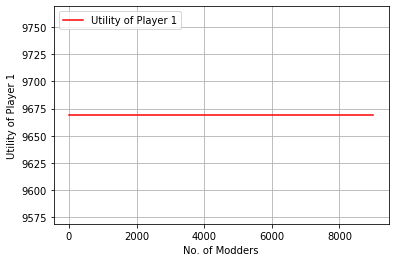

In [24]:
modderList = noOfModdersList
dataList = U_Player1Values

fig = plt.figure()
ax = fig.add_subplot(111)
line = ax.plot(modderList, dataList, '-', color='r', label = 'Utility of Player 1')
ax.legend(loc='upper left')

ax.grid()
ax.set_xlabel("No. of Modders")
ax.set_ylabel(r"Utility of Player 1")
ax.set_ylim(min(dataList)-100, max(dataList)+100)
plt.savefig("Documents/SoSe2020/NEProject/Graphs/sampleGraphs/Player1UtilityTotal.png", dpi=300, bbox_inches='tight')

## Tri Partite Graph Visualization

In [134]:
G_Sample = nx.Graph()

for eachPlayer in list(set(totalUserDf.userId.tolist()))[:5]:
    tempPlayerDf = onlyPlayersAppsDf[onlyPlayersAppsDf.userId == eachPlayer]
    eachPlayerApps = tempPlayerDf.appId.tolist()
    eachPlayerAppDevs = tempPlayerDf.gameDev.tolist()
    eachPlayerAppMins = tempPlayerDf.playtimeMins.tolist()
    i = 0
    for eachApp in eachPlayerApps[:3]:
        G_Sample.add_edge(eachPlayer, eachPlayerAppDevs[i], appId = eachApp)
        tempModderDf = onlyModderAppsDf[onlyModderAppsDf.appId == eachApp]
        eachAppModders = tempModderDf.userId.tolist()
        for eachModder in eachAppModders[:2]:
            G_Sample.add_edge(eachPlayer, eachModder, appId = eachApp)
            G_Sample.add_edge(eachModder, eachPlayerAppDevs[i], appId = eachApp)
        i += 1
len(G_Sample.edges)

51

In [149]:
# game devs = darkblue 
# players = darkgreen
# modders = darkorange
colorMap = []
playersSample = []
moddersSample = []
gameDevsSample = []
nodeLabels = {}
plCount = 1
modCount = 1
for node in G_Sample.nodes():
    if node.isnumeric():
        if node in list(set(onlyPlayersAppsDf.userId.tolist())):
            colorMap.append("darkgreen")
            playersSample.append(node)
            nodeLabels[node] = "Pl " + str(plCount)
            plCount += 1
        else:
            colorMap.append("darkorange")
            moddersSample.append(node)
            nodeLabels[node] = "Mod " + str(modCount)
            modCount += 1
    else:
        colorMap.append("darkblue")
        gameDevsSample.append(node)
        if node == 'Facepunch Studios':
            nodeLabels[node] = "Facepunch"
        else:
            nodeLabels[node] = node

In [146]:
# game devs = darkblue 
# players = darkgreen
# modders = darkorange
edgeColorMap = []
for edge in G_Sample.edges():
    if edge[0].isnumeric() and edge[1].isnumeric():
        edgeColorMap.append("red")
    else:
        edgeColorMap.append("blueviolet")

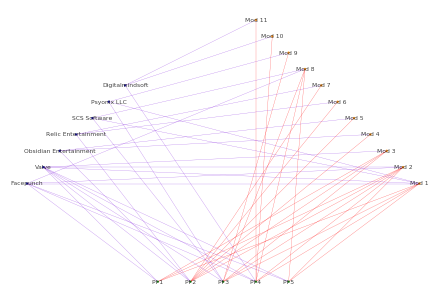

In [150]:
pos = dict()
pos.update( (n, (2+0.25*i, i+6)) for i, n in enumerate(gameDevsSample) ) # put nodes from X at x=1
pos.update( (n, (3 + 0.5*i, 0)) for i, n in enumerate(playersSample, 2) ) # put nodes from Y at x=2
pos.update( (n, (8 - 0.25*i, i+6)) for i, n in enumerate(moddersSample) ) # put nodes from X at x=1

nx.draw(G_Sample, pos=pos, with_labels=True, labels=nodeLabels, font_size=6, label='Sample Visualization', node_color=colorMap, edge_color=edgeColorMap, node_size= 2, alpha=0.75, width=0.25)
plt.savefig("Documents/SoSe2020/NEProject/Graphs/G_Sample.png", dpi=300) # save as png

In [53]:
G_Total = nx.Graph()

In [56]:
j = 0

for eachPlayer in list(set(totalUserDf.userId.tolist()))[15000:]:
    tempPlayerDf = onlyPlayersAppsDf[onlyPlayersAppsDf.userId == eachPlayer]
    eachPlayerApps = tempPlayerDf.appId.tolist()
    eachPlayerAppDevs = tempPlayerDf.gameDev.tolist()
    eachPlayerAppMins = tempPlayerDf.playtimeMins.tolist()
    i = 0
    for eachApp in eachPlayerApps:
        G_Total.add_edge(eachPlayer, eachPlayerAppDevs[i], appId = eachApp)
#         tempModderDf = onlyModderAppsDf[onlyModderAppsDf.appId == eachApp]
#         eachAppModders = tempModderDf.userId.tolist()
#         for eachModder in eachAppModders[:5]:
#             G_Total.add_edge(eachPlayer, eachModder, appId = eachApp)
        i += 1
    if j % 1000 == 0:
        print("Completed: ", j*100/15256)
    j += 1
    
len(G_Total.edges)

Completed:  0.0
Completed:  6.554798112218144
Completed:  13.109596224436288
Completed:  19.664394336654432
Completed:  26.219192448872576
Completed:  32.77399056109072
Completed:  39.328788673308864
Completed:  45.88358678552701
Completed:  52.43838489774515
Completed:  58.993183009963296
Completed:  65.54798112218144
Completed:  72.10277923439958
Completed:  78.65757734661773
Completed:  85.21237545883587
Completed:  91.76717357105402
Completed:  98.32197168327215


446909

In [61]:
# game devs = darkblue 
# players = darkgreen
# modders = darkorange

colorMap = []
players = []
modders = []
gameDevs = []
for node in G_Total.nodes():
    if node.isnumeric():
        if node in list(set(onlyPlayersAppsDf.userId.tolist())):
            colorMap.append("darkgreen")
            players.append(node)
        else:
            colorMap.append("darkorange")
            modders.append(node)

    else:
        colorMap.append("darkblue")
        gameDevs.append(node)

KeyboardInterrupt: 

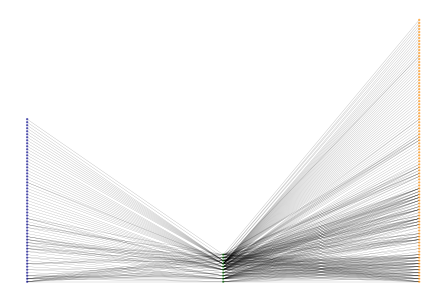

In [51]:
pos = dict()
pos.update( (n, (1, i)) for i, n in enumerate(gameDevs) ) # put nodes from X at x=1
pos.update( (n, (2, i)) for i, n in enumerate(players) ) # put nodes from Y at x=2
pos.update( (n, (3, i)) for i, n in enumerate(modders) ) # put nodes from X at x=1

nx.draw(G_Total, pos=pos, with_labels=False,node_color=colorMap, node_size= 2, alpha=0.5, width=0.2)
plt.savefig("Documents/SoSe2020/NEProject/Graphs/sample.png", dpi=300) # save as png

In [59]:
degreeCentrality = G_Total.degree(gameDevs)
degreeCentrality

DegreeView({'76561197993211031': 3, 'Facepunch Studios': 19898, 'Valve': 21796, 'Deep Silver Volition': 7805, '76561198067513360': 9, 'Obsidian Entertainment': 1066, 'Relic Entertainment': 7606, 'Double Eleven': 4067, 'Bethesda Game Studios': 10550, 'Young Horses': 1339, 'Colossal Order Ltd.': 6525, 'Two Point Studios': 1149, '76561198233620532': 7, 'SCS Software': 8986, 'Psyonix LLC': 9905, 'Bohemia Interactive': 7227, 'The Behemoth': 5468, 'Studio Wildcard': 4911, '76561198138629503': 3, 'Digitalmindsoft': 1497, '76561198147126144': 14, 'Secret Exit Ltd.': 716, 'Skybox Labs': 3840, 'Digital Confectioners': 1751, 'Croteam': 5623, 'Team Fractal Alligator': 4194, 'Wallpaper Engine Team': 9109, 'Funcom': 1683, 'Haydee Interactive': 150, '76561198280755197': 11, 'Paradox Development Studio': 4285, 'TaleWorlds Entertainment': 3550, 'CREATIVE ASSEMBLY': 1754, 'Firaxis Games': 4760, 'Frontier Developments': 1896, 'Saber Interactive': 831, '76561198127388632': 18, 'Squad': 3027, 'Keen Softwar

In [159]:
degreeCentralityDict = dict(degreeCentrality)

In [160]:
degreeCentralityDf = pd.DataFrame.from_dict(degreeCentralityDict, orient = 'index', columns = ['Degree'])

In [161]:
degreeCentralityDf = degreeCentralityDf.reset_index().rename(columns = {'index': 'nodeName'})
degreeCentralityDf

,nodeName,Degree
0,76561197993211031,3
1,Facepunch Studios,19898
2,Valve,21796
3,Deep Silver Volition,7805
4,76561198067513360,9
...,...,...
29011,76561198350144713,4
29012,76561198380233529,1
29013,76561198098582873,4
29014,76561198439426895,2


In [67]:
degreeCentralityDf = degreeCentralityDf.sort_values(by='Degree', ascending=False)

In [73]:
degreeCentralityDf.to_csv(r'Documents/SoSe2020/NEProject/Data/degreeNodes.csv', index='False')

In [155]:
eigenCentrality = nx.eigenvector_centrality(G_Total, max_iter=300, tol=1e-03)
eigenCentrality

{'76561197993211031': 7.912093325677165e-05,
 'Facepunch Studios': 0.39360686271920026,
 'Valve': 0.4311497455495539,
 'Deep Silver Volition': 0.1544045012505668,
 '76561198067513360': 0.00019780233314192912,
 'Obsidian Entertainment': 0.02110550894624401,
 'Relic Entertainment': 0.15046823482104077,
 'Double Eleven': 0.08046598912213397,
 'Bethesda Game Studios': 0.2087012416980487,
 'Young Horses': 0.026505512641018726,
 'Colossal Order Ltd.': 0.12908580260840102,
 'Two Point Studios': 0.022747268311322035,
 '76561198233620532': 0.0001582418665135433,
 'SCS Software': 0.17776495679463825,
 'Psyonix LLC': 0.19594299121038902,
 'Bohemia Interactive': 0.142971526394959,
 'The Behemoth': 0.10817809599530735,
 'Studio Wildcard': 0.09716050603930623,
 '76561198138629503': 7.912093325677165e-05,
 'Digitalmindsoft': 0.029630789504661234,
 '76561198147126144': 0.00029670349971289367,
 'Secret Exit Ltd.': 0.014182427286276424,
 'Skybox Labs': 0.07597587615981395,
 'Digital Confectioners': 0.03

In [162]:
degreeCentralityDf["Eigenvector"] = list(eigenCentrality.values())
degreeCentralityDf = degreeCentralityDf.sort_values(by='Eigenvector', ascending=False)
degreeCentralityDf.to_csv(r'Documents/SoSe2020/NEProject/Data/centralityNodes.csv', index='False')

In [163]:
degreeCentralityDf

,nodeName,Degree,Eigenvector
2,Valve,21796,0.431150
1,Facepunch Studios,19898,0.393607
52,Tripwire Interactive,11476,0.227018
8,Bethesda Game Studios,10550,0.208701
58,Klei Entertainment,10269,0.203143
...,...,...,...
10261,76561198232485372,1,0.000040
23735,76561198835981538,1,0.000040
20898,76561198381585058,1,0.000040
1700,76561198257663397,1,0.000040


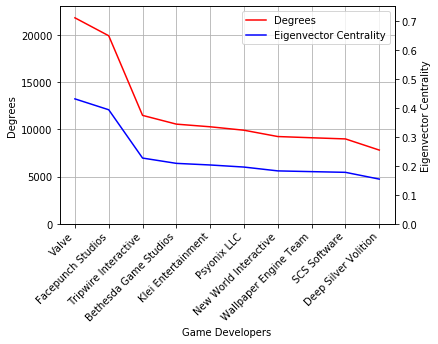

In [176]:
topGameDevs = degreeCentralityDf.nodeName.tolist()[:10]
degreeCentrDevs = degreeCentralityDf.Degree.tolist()[:10]
eigenCentrDevs = degreeCentralityDf.Eigenvector.tolist()[:10]

fig = plt.figure()
ax = fig.add_subplot(111)

line1 = ax.plot(topGameDevs, degreeCentrDevs, '-', color='r', label = 'Degrees')
ax2 = ax.twinx()
line2 = ax2.plot(topGameDevs, eigenCentrDevs, '-', color='b', label = 'Eigenvector Centrality')

#added these three lines
lns = line1+line2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)

ax.grid()
ax.set_xlabel("Game Developers")
ax.set_ylabel(r"Degrees")
ax2.set_ylabel(r"Eigenvector Centrality")
ax2.set_ylim(0, 0.75)
ax.set_ylim(0,23000)
for label in ax.get_xticklabels():
    label.set_ha("right")
    label.set_rotation(45)
plt.savefig("Documents/SoSe2020/NEProject/Graphs/GameDevCentrality.png", dpi=300, bbox_inches='tight')